In [1]:
import pandas as pd #to load and manipulate data and for one-hot encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs

from sklearn.tree import DecisionTreeClassifier #to build decision tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.metrics import confusion_matrix # to create a confussion matrix
from sklearn.metrics import plot_confusion_matrix # to draw confusion matrix


In [2]:
df = pd.read_csv('processed.cleveland.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = [
    'age',       
    'sex',       
    'cp',         
    'restbps',  
    'chol', 
    'fbs',       
    'restecg',   
    'thalach',   
    'exang',     
    'oldpeak',   
    'slope',     
    'ca',        
    'thal',      
    'hd',
]

In [5]:
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Dealing with missing data

In [6]:
print(f"Dataset info :- \n {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbps  303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
Dataset info :- 
 None


In [7]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
#print out the rows that contain missing values
len(df.loc[(df['ca']=='?')
|
(df['thal']=='?')])

6

In [9]:
df = df.loc[(df['ca'] != '?') 
&
(df['thal'] != '?')]

In [12]:
print(f"Dataset Shape :- \n {df.shape})")

Dataset Shape :- 
 (297, 14))


## Split the data into dependent and independent variables

In [13]:
# Features and target creations
X = df.drop(['hd'],axis=1).copy()
y = df[['hd']].copy()

In [16]:
y

,hd
0,0
1,2
2,1
3,0
4,0
...,...
297,1
298,1
299,2
300,3


## Format the Data: One Hot Encoding

 * age - **Float**

 * sex - **Category**
	 *  0 = female
	 *  1 = male
* cp, chest pain - **Category**
	*  1 = typical angina
	*  2 = atypical angina
	*  3 = non-anginal pain
	*  4 = asymptomatic
* restbp, resting blood pressure(in mm Hg) - **Float**
* chol, serum cholesterol in mg/dl - **Float**
* fbs, fasting blood sugar - **Category**
	*  0 =>= 120 mg/dl
	* 1 =< 120 mg/dl
*  restecg, resting electrocardiographic results - **Category**
	* 0 = normal
	* 1 = having ST-T wave abnormality
	* 2 = showing probable or definite left venticular hypertrophy
* thalach, maximum heart rate achieved - **Float**
* exang, exercise induced angina - **Category**
	* 0 = no
	* 1 = yes
* oldpeak, St depression induced by exercise relative to rest - **Float**
* Slope, the slope of the peak exercise ST segment - **Category**
	* 1 = unsloping
	* 2 = flat
	* 3 = downsloping
* ca, number of major vessels(0-3) colored by fluoroscopy - **Float**
* Thal, thalium heart scan - **Category**
	* 3 = normal
	* 6 = fix defect
	* 7 = reversible defect 


In [17]:
X_encoded = pd.get_dummies(X, columns=['cp',
'restecg',
'slope',
'thal'])

In [18]:
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [19]:
print(f"Unique values of target variable :- \n {df['hd'].unique()}")

Unique values of target variable :- 
 [0 2 1 3 4]


In [20]:
y_not_zero_index = y > 0 #getting the index of non zero values
y[y_not_zero_index] = 1

In [21]:
y

,hd
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [22]:
#split the data into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=29,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(207, 22)
(90, 22)
(207, 1)
(90, 1)


In [24]:
from sklearn.metrics import classification_report

# initialize object for DecisionTreeClassifier class
dt_classifier  = DecisionTreeClassifier(random_state=29)
# train model by using fit method
print("Model training starts.")
dt_classifier.fit(X_train,y_train)
print("Model training completed")
acc_score = dt_classifier.score(X_test, y_test)
print(f'Accuracy of model on test dataset :- {acc_score}')

# predict result using test dataset
y_pred = dt_classifier.predict(X_test)
# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Model training starts.
Model training completed
Accuracy of model on test dataset :- 0.7333333333333333
Confusion Matrix :- 
 [[32 10]
 [14 34]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        42
           1       0.77      0.71      0.74        48

    accuracy                           0.73        90
   macro avg       0.73      0.74      0.73        90
weighted avg       0.74      0.73      0.73        90



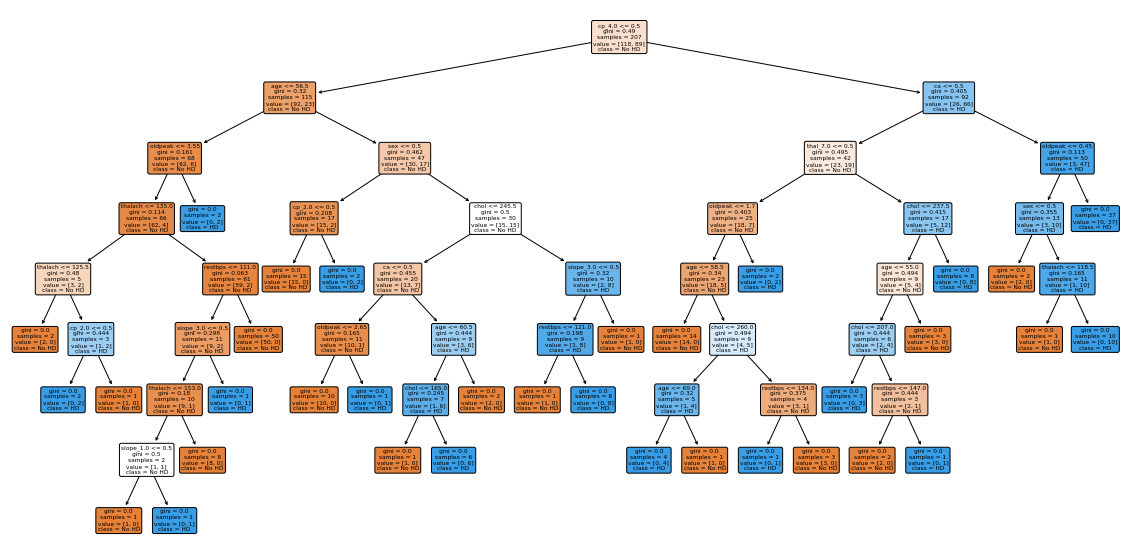

In [29]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier,
filled=True,
rounded=True,
class_names=['No HD', 'HD'],
feature_names=X_encoded.columns);

d:\ATT\Data_Science_Projects\Classification\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


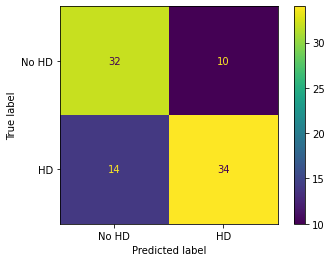

In [32]:
#Creating confusion matrix
plot_confusion_matrix(dt_classifier,X_test,y_test, display_labels=['No HD', 'HD'])